# Phân tích mối quan hệ & tương quan - Initial Observations & Insight

Notebook này tập trung vào phần **Relationships & Correlations- Initial Observations & Insight** cho bộ dữ liệu nhà trọ, bao gồm:

1. **Preliminary Patterns**
   - Tính ma trận tương quan cho các biến số (numerical)
   - Vẽ **correlation heatmap**
   - Tìm và diễn giải các cặp biến tương quan mạnh (dương / âm)
   - Ghi nhận các mối quan hệ bất ngờ / thú vị

2. **Cross-tabulations**
   - Bảng tần số cho các cặp **categorical × categorical**
   - Thống kê mô tả nhóm cho các cặp **numerical × categorical**

3. **Initial Observations & Insights**
   - Nhận xét chính
   - Vấn đề chất lượng dữ liệu (data quality)
   - Các bước tiền xử lý (preprocessing) cần thiết
   - Các pattern thú vị dẫn đến câu hỏi nghiên cứu

4. **Red Flags**
   - Các vấn đề nghiêm trọng về dữ liệu
   - Hạn chế của bộ dữ liệu đối với phân tích / mô hình hóa


## 1. Khởi tạo: Import thư viện & đọc dữ liệu

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

CSV_PATH = "../Data/cleaned.csv"

df = pd.read_csv(CSV_PATH)

print("Kích thước dữ liệu:", df.shape)
df.head()

Kích thước dữ liệu: (24121, 20)


,title,description,location,address,street_name,price,area,date,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking,url
0,"Phòng riêng C3 phạm hùng - tạ quang bửu, gác s...",Cập nhật 10 giờ ngày 5 tháng 11 năm 2025: Giảm...,"Đường Phạm Hùng, Phường 5, Quận 8, Hồ Chí Minh",Quận 8 - Hồ Chí Minh,Phạm Hùng,2.8,30.0,2025-11-19,1,1,1,1,1,0,1,1,1,1,1,https://phongtro123.com/nha-tro-hem-c3-pham-hu...
1,Cần cho thuê phòng từ 1tr3-4tr Chung cư Era To...,Cho thuê phòng ở Chung cư Era Town Đức Khải - ...,"Đường Nguyễn Lương Bằng, Quận 7, Hồ Chí Minh",Quận 7 - Hồ Chí Minh,Nguyễn Lương Bằng,1.3,15.0,2025-11-16,1,1,1,1,1,1,1,1,1,1,1,https://phongtro123.com/phong-share-tro-chung-...
2,"Phòng trọ ngay Thành Thái, trung tâm Quận 10, ...","Cho thuê phòng trọ ngay trung tâm Quận 10, gần...","43/3 Đường Thành Thái, Quận 10, Hồ Chí Minh",Quận 10 - Hồ Chí Minh,Thành Thái,4.5,25.0,2025-11-06,1,1,1,1,1,0,0,1,1,1,1,https://phongtro123.com/phong-tro-ngay-thanh-t...
3,"Cực phẩm KTX, Phòng trọ, Sang, Xịn, Mịn Giá si...","> Giá trọn gói, không phát sinh bất cứ khoản p...","101 Đường số 8, Phường Linh Đông, Thủ Đức, Hồ ...",Thủ Đức - Hồ Chí Minh,Số 8,1.2,30.0,2025-11-11,1,1,1,1,1,1,1,1,1,1,1,https://phongtro123.com/cuc-pham-ktx-phong-tro...
4,"CHO THUÊ SLEEPBOX, KÍ TÚC XÁ HIỆN ĐẠI TẠI TRUN...","SLEEPBOX, KTX HIỆN ĐẠI VỊ TRÍ TRUNG TÂM TPHCM ...","361A Đường Phạm Ngũ Lão, Phường Bến Thành, Quậ...",Quận 1 - Hồ Chí Minh,Phạm Ngũ Lão,1.5,30.0,2025-11-14,1,1,1,1,1,0,1,1,1,1,1,https://phongtro123.com/cho-thue-sleepbox-ki-t...


### 1.1. Khám phá sơ bộ cấu trúc dữ liệu

Ở bước này ta:

- Xem thông tin kiểu dữ liệu (`info`)
- Thống kê mô tả cho:
  - Biến số (numerical): `describe()`
  - Biến phân loại (categorical): `describe(include="object")`
- Xem tỷ lệ thiếu dữ liệu ở từng cột

Mục tiêu: hiểu sơ bộ dataset, nhận diện nhanh các cột quan trọng và các vấn đề chất lượng dữ liệu.


In [36]:
# Thông tin kiểu dữ liệu + số lượng non-null
df.info()

# Thống kê mô tả cho biến số
print("\n=== Describe numerical columns ===")
display(df.describe())

# Thống kê mô tả cho biến phân loại
print("\n=== Describe categorical columns ===")
display(df.describe(include="object"))

# Tỷ lệ missing của từng cột
missing_ratio = df.isna().mean().sort_values(ascending=False)
print("\n=== Tỷ lệ missing theo cột ===")
display(missing_ratio.to_frame("missing_ratio"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24121 entries, 0 to 24120
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             24121 non-null  object 
 1   description       24113 non-null  object 
 2   location          24113 non-null  object 
 3   address           24121 non-null  object 
 4   street_name       24120 non-null  object 
 5   price             24062 non-null  float64
 6   area              24113 non-null  float64
 7   date              24113 non-null  object 
 8   air_conditioning  24121 non-null  int64  
 9   fridge            24121 non-null  int64  
 10  washing_machine   24121 non-null  int64  
 11  mezzanine         24121 non-null  int64  
 12  kitchen           24121 non-null  int64  
 13  wardrobe          24121 non-null  int64  
 14  bed               24121 non-null  int64  
 15  balcony           24121 non-null  int64  
 16  elevator          24121 non-null  int64 

,price,area,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
count,24062.000000,24113.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000
mean,3.798834,28.068236,0.919945,0.813648,0.897890,0.937067,0.842710,0.761370,0.796111,0.883048,0.985448,0.864641,0.851291
std,2.296569,17.293287,0.271384,0.389399,0.302799,0.242847,0.364082,0.426255,0.402896,0.321370,0.119752,0.342114,0.355808
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.800000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.600000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,260.000025,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



=== Describe categorical columns ===


,title,description,location,address,street_name,date,url
count,24121,24113,24113,24121,24120,24113,24121
unique,23786,23899,12787,140,2579,687,23986
top,Connection timed out Error code 522,"Phòng rộng rãi thoáng mát, đẹp, sạch sẽ, có bế...","Đường Cộng Hòa, Phường 13, Quận Tân Bình, Hồ C...",Quận Bình Thạnh - Hồ Chí Minh,Số,2025-11-17,https://phongtro123.com/cho-thue-phong-q3-rong...
freq,5,3,138,3103,1012,122,2



=== Tỷ lệ missing theo cột ===


,missing_ratio
price,0.002446
location,0.000332
area,0.000332
date,0.000332
description,0.000332
street_name,0.000041
title,0.000000
wardrobe,0.000000
parking,0.000000
free_time,0.000000


### 1.2. Chuẩn hoá một số kiểu dữ liệu

Trong dataset này, cột `created_at` đang ở dạng chuỗi ngày tháng (`string`), ta chuyển sang `datetime`
để có thể phân tích theo thời gian (nếu cần), ví dụ:

- Ngày đăng tin → `day`
- Tháng đăng tin → `month`
- Năm đăng tin → `year`

Đồng thời, ta tách danh sách **biến số** và **biến phân loại** để dùng cho phần tương quan sau.


In [37]:
# Chuyển created_at sang datetime nếu tồn tại
if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
    df["created_year"] = df["created_at"].dt.year
    df["created_month"] = df["created_at"].dt.month
    df["created_day"] = df["created_at"].dt.day

# Xác định numerical vs categorical 
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Nếu có các cột ngày đã tách, thêm vào numerical (vì là số nguyên)
for c in ["created_year", "created_month", "created_day"]:
    if c in df.columns and c not in numeric_cols:
        numeric_cols.append(c)

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Các cột numerical:", numeric_cols)
print("\nCác cột categorical:", categorical_cols)

Các cột numerical: ['price', 'area', 'air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']

Các cột categorical: ['title', 'description', 'location', 'address', 'street_name', 'date', 'url']


## **2. Relationships & Correlations (Preliminary Patterns)**

Trong phần này, ta tập trung vào **mối quan hệ giữa các biến số** (numerical) thông qua:

1. **Ma trận tương quan (Correlation matrix)**
2. **Heatmap trực quan hoá tương quan**
3. **Danh sách các cặp biến tương quan mạnh (|r| lớn)**

Note: Ở đây sử dụng hệ số tương quan **Pearson** cho các biến số.


In [38]:
# Chỉ giữ những numerical columns không bị missing quá nhiều
num_for_corr = [c for c in numeric_cols if df[c].notna().mean() > 0.95]

corr_matrix = df[num_for_corr].corr(method="pearson")

print("Danh sách biến dùng để tính tương quan:")
print(num_for_corr)

corr_matrix

Danh sách biến dùng để tính tương quan:
['price', 'area', 'air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']


,price,area,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
price,1.000000,0.085751,-0.030875,-0.038116,-0.017753,-0.031964,-0.022203,-0.052558,-0.046588,-0.023582,-0.024786,-0.003097,-0.021752
area,0.085751,1.000000,0.008489,-0.008093,-0.002898,-0.007735,0.011050,-0.013505,-0.002876,0.004844,-0.011596,0.008002,0.010397
air_conditioning,-0.030875,0.008489,1.000000,0.483403,0.489807,0.168894,0.206560,0.480690,0.545752,0.266763,0.232056,0.111468,0.126165
fridge,-0.038116,-0.008093,0.483403,1.000000,0.582287,0.221895,0.274591,0.807630,0.628290,0.367844,0.219241,0.140843,0.138413
washing_machine,-0.017753,-0.002898,0.489807,0.582287,1.000000,0.168578,0.198036,0.547113,0.445470,0.307161,0.241433,0.217963,0.141893
mezzanine,-0.031964,-0.007735,0.168894,0.221895,0.168578,1.000000,0.084513,0.236208,0.249369,0.199460,0.371963,0.075614,0.096568
kitchen,-0.022203,0.011050,0.206560,0.274591,0.198036,0.084513,1.000000,0.246215,0.182993,0.081244,0.106304,0.115982,0.169238
wardrobe,-0.052558,-0.013505,0.480690,0.807630,0.547113,0.236208,0.246215,1.000000,0.715649,0.393096,0.197564,0.135292,0.135323
bed,-0.046588,-0.002876,0.545752,0.628290,0.445470,0.249369,0.182993,0.715649,1.000000,0.402440,0.198874,0.134242,0.134960
balcony,-0.023582,0.004844,0.266763,0.367844,0.307161,0.199460,0.081244,0.393096,0.402440,1.000000,0.217560,0.162207,0.125268


### **Visualize**: Correlation heatmap

Ta vẽ heatmap bằng `matplotlib` để trực quan hoá mức độ tương quan:

- Ô càng đậm → |r| càng lớn (tương quan mạnh hơn)
- Đường chéo chính luôn bằng 1 (biến tự tương quan với chính nó)


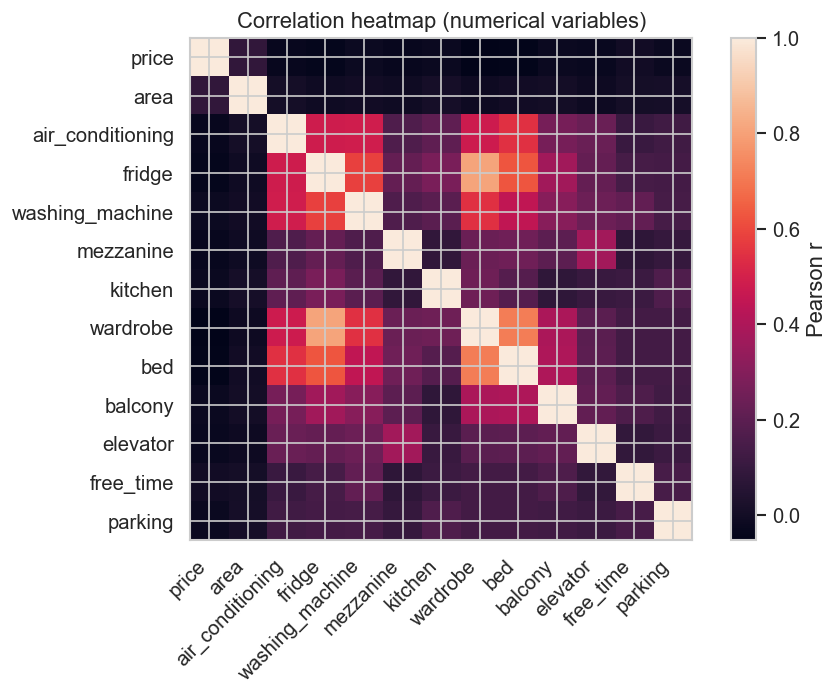

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(corr_matrix.values)

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(corr_matrix.index)

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Pearson r", rotation=90)

ax.set_title("Correlation heatmap (numerical variables)")
plt.tight_layout()
plt.show()

### **Các cặp biến tương quan mạnh (positive / negative)**

Ta trích xuất các cặp biến có |r| lớn hơn một ngưỡng (ví dụ **0.5**):

- \|r\| ≥ 0.7 → tương quan rất mạnh
- 0.5 ≤ \|r\| < 0.7 → tương quan tương đối mạnh
- 0.3 ≤ \|r\| < 0.5 → tương quan trung bình

Ta sẽ:

1. Lấy phần **tam giác trên** của ma trận tương quan (để không trùng lặp cặp)
2. Sắp xếp theo |r| giảm dần
3. Hiển thị top các cặp tương quan lớn


In [40]:
threshold = 0.5

pairs = []
cols = corr_matrix.columns.tolist()
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        c1, c2 = cols[i], cols[j]
        r = corr_matrix.loc[c1, c2]
        pairs.append((c1, c2, r, abs(r)))

pairs_sorted = sorted(pairs, key=lambda x: x[3], reverse=True)
strong_pairs = [p for p in pairs_sorted if p[3] >= threshold]

strong_df = pd.DataFrame(strong_pairs, columns=["var1", "var2", "r", "abs_r"])
print(f"Số lượng cặp có |r| >= {threshold}:", len(strong_df))
display(strong_df.head(20))

Số lượng cặp có |r| >= 0.5: 6


,var1,var2,r,abs_r
0,fridge,wardrobe,0.807630,0.807630
1,wardrobe,bed,0.715649,0.715649
2,fridge,bed,0.628290,0.628290
3,fridge,washing_machine,0.582287,0.582287
4,washing_machine,wardrobe,0.547113,0.547113
5,air_conditioning,bed,0.545752,0.545752


### **Phân tích & Nhận xét**
### **1. Tổng quan**
- Nhìn qua ma trận tương quan giữa các tiện ích (`air_conditioning`, `fridge`, `washing_machine`, `mezzanine`, `kitchen`, `wardrobe`, `bed`, `balcony`, `elevator`, `free_time`, `parking`) và các biến số (`price`, `area`) cho thấy cấu trúc phân khúc rất rõ ràng trong thị trường phòng trọ/căn hộ.
- Dữ liệu phản ánh **3 phân khúc** chính:
  1. **Phòng trọ cơ bản / bình dân** – ít tiện ích.  
  2. **Phòng trọ full nội thất** – nhiều tiện ích đi kèm nhau.  
  3. **Căn hộ mini / Chung cư** – đặc trưng bởi balcony, elevator, washing_machine.

Việc hiểu cấu trúc này giúp xác định hướng feature engineering và mô hình phù hợp.

### **2. Key Correlation Findings**

##### **2.1 Price & Area: Weak Correlation**
 - `price` ↔ amenities: **–0.04 đến 0.05** → gần như không liên quan.
 - `area` ↔ amenities: **≈ 0**.
 - `price` ↔ `area`: **0.085** (rất yếu).

 **Điều này cho thấy tiện ích & diện tích không phải yếu tố quyết định giá** (giá chủ yếu phụ thuộc *địa điểm*, ...):
  * **Giá không tăng rõ ràng khi thêm tiện ích:**
    * Việc có `air_conditioning`, `washing_machine`, `kitchen`, `balcony`... không làm hệ số tương quan với `price` tăng lên đáng kể. Điều này chứng tỏ **vị trí, phân khúc, quận/huyện, chất lượng tòa nhà** quan trọng hơn nhiều so với việc chỉ có thêm 1–2 tiện ích vì chẳng ai muốn phòng trọ cách nơi học tập/làm việc hàng cây số, vừa kẹt xe vừa phải tốn thời gian di chuyển.
  * **Diện tích (`area`) cũng không phải yếu tố duy nhất quyết định giá:**
    * Trong dataset này, diện tích không áp đảo về tương quan giá. Có thể do:
        * Phòng nhỏ nhưng **vị trí siêu đẹp, full nội thất** thì giá vẫn đắt.
        * Phòng lớn nhưng **xa trung tâm, nội thất cơ bản** thì giá rẻ hơn.
    * **Liên hệ thực tế:** Đi xem trọ ở Sài Gòn, ta sẽ thấy thực tế đúng y chang dữ liệu: Một phòng **15–20m²** ở trung tâm, nội thất full, đôi khi đắt hơn hẳn căn **30–40m²** ở ngoại thành, bất chấp diện tích nhỏ hơn nhiều.

##### **2.2 "Full Furnished Cluster" – Cụm nội thất mạnh**
  Các tiện ích nội thất có tương quan mạnh:
 
  | Cặp | r |
  |------|------|
  | fridge ↔ wardrobe | **0.8076** |
  | bed ↔ wardrobe | **0.7156** |
  | bed ↔ fridge | **0.6283** |
  | washing_machine ↔ fridge | 0.5823 |
  | air_conditioning ↔ bed | 0.5457 |
  | air_conditioning ↔ fridge | 0.48 |
  | wardrobe ↔ kitchen | 0.246 |
 
  Tồn tại một **phân khúc rõ rệt**: phòng full nội thất. Nghĩa là khi người chủ họ trang bị nội thất thì xu hướng chung sẽ trang bị full combo đầy đủ chứ không chỉ trang bị nội thất đơn lẻ hay nói cách khác khi một phòng đã có tủ lạnh, thì gần như chắc chắn cũng có tủ quần áo + giường, và khả năng cao có máy lạnh + máy giặt.

##### **2.3 “Apartment Cluster” – Balcony, Elevator, Parking**
 Ở nhóm này, tương quan không mạnh như **full nội thất**, nhưng vẫn có một số mức đáng chú ý trong khoảng **0.2–0.4**:
  | Cặp | r |
  |------|------|
  | balcony ↔ bed | **~0.40** |
  | balcony ↔ wardrobe | **~0.39** |
  | balcony ↔ fridge | **~0.37** |
  | elevator ↔ mezzanine | **~0.37** |
  | balcony ↔ washing_machine | ~0.31 |
  | elevator ↔ washing_machine | ~0.24 |
  | balcony ↔ elevator | ~0.22 |
  | free_time ↔ washing_machine / fridge / kitchen | ~0.14–0.21 |
  | parking ↔ washing_machine | ~0.14 |
  | parking ↔ air_conditioning | ~0.13 |
  
  **Có thể nói rằng:**
   * **Dấu hiệu của phòng trọ dạng 'Căn hộ / Chung cư mini':** Những phòng có **ban công** thường cũng là phòng có **giường, tủ, tủ lạnh, máy giặt** cho thấy nhiều khả năng là căn hộ hoặc chung cư mini, chứ không phải phòng trọ nhỏ lẻ vì nhà trọ truyền thống thông thường sẽ hiếm khi có được ban công mà chỉ là các dãy phòng.
   * **Gói tiện ích gắn liền:** **Thang máy** thường đi kèm máy giặt, tủ lạnh, nội thất, điều này càng củng cố việc đây là một phân khúc phòng trọ dạng 'Căn hộ / chung cư mini'. Vì thông thường các căn hộ / chung cư mini sẽ có nhiều tầng nên sẽ trang bị thêm thang máy.
   * *Funfact: "Nếu phòng có **ban công + thang máy + máy giặt** thì **90%** khả năng cao là căn hộ mini / chung cư chứ không phải phòng trọ truyền thống như hồi xưa."*

##### **2.4 Mezzanine (gác lửng)**
 Mezzanine tương quan **dương nhẹ** với:
  - washing_machine: 0.16  
  - fridge: 0.22  
  - wardrobe: 0.23  
  - elevator: **0.37** (khá cao so với các cặp trong bộ dữ liệu)  

  Điều này cho thấy dataset chứa **cả phòng trọ gác truyền thống** lẫn **căn hộ duplex có gác**. Feature này xuất hiện ở hai phân khúc giá hoàn toàn khác nhau, khiến nó không thể được hiểu theo một chiều, không thể kết luận: “Có gác” = phòng rẻ hoặc “Có gác” = phòng cao cấp, ta cần kết hợp mezzanine với các tiện ích khác để phân loại đúng phân khúc. Điều này giải thích vì sao mezzanine lại có tương quan dương với nhiều tiện ích nội thất với một giá trị trung bình thấp và tương đối cao với elevator.

##### **2.5 Tự do giờ giấc đi kèm tiện nghi**
 Tự do ra vào, không nghiêm nghặt giờ giấc cũng là 1 feature thú vị khi có mức tương quan nhẹ so với các tiện ích:
 | Cặp | r |
 |------|------|
 | free_time ↔ washing_machine | ~0.22 |
 | free_time ↔ parking | ~0.15 |
 | free_time ↔ fridge | ~0.14 |
 | free_time ↔ kitchen | ~0.12 |
 | free_time ↔ air_conditioning | ~0.11 |
 **Điều này cho thấy:**
  * **Phòng tự do giờ giấc có xu hướng:**
     * Tiện nghi hơn.
     * Có nội thất tốt hơn.
     * Có chỗ để xe đàng hoàng.
  * **Điều này hợp lý vì:**
     * Những nhà khó tính / chung chủ thường sẽ giới nghiêm giờ giấc.
     * Loại hình phòng bị giới nghiêm thường bình dân hơn và ít tiện ích hơn vì những người chủ nhà đang "dư" phòng nên "sẳn tiện" cho thuê.

##### **2.6 Không có hệ số tương quan âm mạnh**
 Trong toàn bộ ma trận, hầu như không xuất hiện hệ số tương quan âm lớn (chỉ quanh −0.00x → −0.05). Điều này cho thấy:
 - Các tiện ích không loại trừ lẫn nhau (không có chuyện có cái này thì mất cái kia).
 - Không tồn tại mối quan hệ “nghịch chiều” rõ rệt giữa bất kỳ cặp biến nào.
 - Các tiện ích được trang bị tự do tuỳ vào chủ trọ, phù hợp thực tế: khi chủ đã trang bị nội thất thì thường trang bị nhiều món cùng lúc.
 - Ý nghĩa: Trong context phòng trọ, việc không có tương quan âm mạnh là điều hợp lý, vì tiện ích thường được thêm theo dạng “combo", chỉ tăng lên chứ không triệt tiêu nhau.

### **3. Kết luận**

 1. **Các tiện ích không xuất hiện đơn lẻ**
    * Không có tương quan âm mạnh, các tiện ích không triệt tiêu nhau mà xuất hiện theo cluster. Có một cụm **“full nội thất”**: `AC`, `fridge`, `washing_machine`, `kitchen`, `wardrobe`, `bed`. 
    * **Điều này gợi mở cho ta một điều:** có thể feature engineering thành 1 feature mới: `num_amenities` hoặc `is_full_furnished`.

 2. **Giá và diện tích gần như độc lập với tiện ích**
    * Nếu muốn model dự đoán giá tốt, bắt buộc phải thêm các biến về **địa điểm (address)**, **loại nhà**, v.v.
    * Không thể chỉ dựa vào `amenities` + `area` vì hệ số tương quan lẫn thực tế ngoài đời cho ta thấy rõ được điều đó.

 3. **Balcony + Elevator + Machine = Hơi hướng căn hộ**
    * Combo này là dấu hiệu nhận biết dạng **“chung cư mini / căn hộ dịch vụ”** cũng có thể feature engineering từ đây.

 4. **Mezzanine (Gác) trong dataset mang tính lưỡng cực**
    * Dữ liệu cho thấy sự tồn tại song song của cả **phòng trọ gác truyền thống** lẫn **căn hộ duplex trang bị nội thất**.

 5. **`free_time` là tín hiệu tốt của “chủ dễ tính thì ở thoải mái”**
    * Khi feature engineering, có thể xem đây là 1 tín hiệu để đánh giá 'môi trường' ở thoải mái.

---

## 3. Cross-tabulations

### 3.1. Categorical × Categorical: Địa bàn (`address`) × Tiện ích

Trong phần này, ta phân tích mối quan hệ giữa **khu vực địa lý** và **các tiện ích** của phòng trọ.

- Cột `address` đã được chuẩn hoá để thể hiện **quận/huyện + tỉnh/thành phố**, ví dụ:  
  - `"Quận Bình Thạnh, TP.HCM"`  
  - `"Quận Gò Vấp, TP.HCM"`  
  - `"Thành phố Thủ Đức, TP.HCM"`  
- Cột `location` chỉ là text raw dùng để trích xuất, **không dùng trực tiếp** cho phân tích.

Các tiện ích được mã hoá dạng nhị phân (0/1):

- `air_conditioning` – có máy lạnh  
- `fridge` – có tủ lạnh  
- `washing_machine` – có máy giặt  
- `mezzanine` – có gác lửng  
- `kitchen` – có bếp  
- `wardrobe` – có tủ quần áo  
- `bed` – có giường  
- `balcony` – có ban công  
- `elevator` – có thang máy  
- `free_time` – giờ giấc tự do (không giới hạn giờ)  
- `parking` – có chỗ để xe  

Mục tiêu của phần này:

1. Thống kê tần suất xuất hiện của từng **địa bàn (`address`)**:
   - Xem **top 10 địa bàn có nhiều tin nhất**.
   - Xem **top 10 địa bàn có ít tin nhất** (các khu vực hiếm, ít dữ liệu).
2. Chọn nhóm **top 10 địa bàn có nhiều tin nhất** để phân tích chi tiết (giảm nhiễu do địa bàn quá ít mẫu).
3. Với mỗi tiện ích, tính **tỷ lệ % phòng CÓ tiện ích** đó theo từng địa bàn trong nhóm top này.
4. Ghép lại thành một **bảng tổng hợp**:  
   - Dòng: địa bàn (address).  
   - Cột: % phòng CÓ từng tiện ích.  
5. Tạo thêm một **bảng tóm tắt**: với mỗi tiện ích, cho biết:
   - Địa bàn có tỷ lệ CÓ tiện ích **cao nhất**.  
   - Địa bàn có tỷ lệ CÓ tiện ích **thấp nhất**.  
6. Trực quan hoá bằng **biểu đồ cột** cho từng tiện ích.

### **Thống kế số lượng tin theo địa bàn**

In [41]:
district_col = "address"

# Danh sách tiện ích
amenity_cols = [
    "air_conditioning",
    "fridge",
    "washing_machine",
    "mezzanine",
    "kitchen",
    "wardrobe",
    "bed",
    "balcony",
    "elevator",
    "free_time",
    "parking",
]

# Giữ lại những cột tiện ích thực sự tồn tại trong df
amenity_cols = [c for c in amenity_cols if c in df.columns]
print("Các tiện ích tìm thấy trong dataset:", amenity_cols)

# Thống kê số lượng tin theo địa bàn (bỏ NaN nếu có)
district_counts = df[district_col].dropna().value_counts()

# Top 10 địa bàn có nhiều tin nhất
top10_most = district_counts.nlargest(10)

# Top 10 địa bàn có ít tin nhất
top10_least = district_counts.nsmallest(10)

print("\nTop 10 địa bàn có nhiều tin nhất:")
display(top10_most)

print("\nTop 10 địa bàn có ít tin nhất:")
display(top10_least)

# Dữ liệu con dùng cho phân tích chi tiết 
df_top = df[df[district_col].isin(top10_most.index)].copy()

# Tổng số tin toàn dataset
total_posts = len(df)

# Số tin thuộc top 10 địa bàn nhiều tin
top10_posts = top10_most.sum()

# Tỷ lệ %
top10_ratio = top10_posts / total_posts * 100

print(f"Tổng số tin toàn bộ dataset: {total_posts}")
print(f"Số tin tại Top 10 địa bàn nhiều tin nhất: {top10_posts}")
print(f"Tỷ lệ chiếm: {top10_ratio:.2f}%")

Các tiện ích tìm thấy trong dataset: ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']

Top 10 địa bàn có nhiều tin nhất:


address
Quận Bình Thạnh - Hồ Chí Minh    3103
Quận Tân Bình - Hồ Chí Minh      2829
Quận Gò Vấp - Hồ Chí Minh        2226
Quận Tân Phú - Hồ Chí Minh       1691
Quận 7 - Hồ Chí Minh             1310
Quận 12 - Hồ Chí Minh            1065
Quận 10 - Hồ Chí Minh            1060
Quận Bình Tân - Hồ Chí Minh      1057
Quận 9 - Hồ Chí Minh             1016
Quận Phú Nhuận - Hồ Chí Minh      872
Name: count, dtype: int64


Top 10 địa bàn có ít tin nhất:


address
Huyện Châu Thành Hậu Giang - Hậu Giang    1
Thành phố Hà Giang - Hà Giang             1
Huyện Diên Khánh - Khánh Hòa              1
Thị xã Điện Bàn - Quảng Nam               1
Huyện Nhơn Trạch - Đồng Nai               1
Huyện Lai Vung - Đồng Tháp                1
Huyện Mỹ Hào - Hưng Yên                   1
Huyện Phù Cát - Bình Định                 1
Thành Phố Đông Hà - Quảng Trị             1
Thành Phố Bà Rịa - Bà Rịa - Vũng Tàu      1
Name: count, dtype: int64

Tổng số tin toàn bộ dataset: 24121
Số tin tại Top 10 địa bàn nhiều tin nhất: 16229
Tỷ lệ chiếm: 67.28%


#### **Nhận xét về số lượng tin đăng theo địa bàn**

#### 1. Top 10 địa bàn có nhiều tin đăng nhất
**Danh sách bao gồm:**
* Quận Bình Thạnh – Hồ Chí Minh (3103 tin)
* Quận Tân Bình – Hồ Chí Minh (2829 tin)
* Quận Gò Vấp – Hồ Chí Minh (2226 tin)
* Quận Tân Phú – Hồ Chí Minh (1691 tin)
* Quận 7 – Hồ Chí Minh (1310 tin)
* Quận 12 – Hồ Chí Minh (1065 tin)
* Quận 10 – Hồ Chí Minh (1060 tin)
* Quận Bình Tân – Hồ Chí Minh (1057 tin)
* Quận 9 – Hồ Chí Minh (1016 tin)
* Quận Phú Nhuận – Hồ Chí Minh (872 tin)

**Nhận xét:**
* **Tất cả top 10 địa bàn đều thuộc TP. Hồ Chí Minh**, không có quận/huyện nào từ Hà Nội hay tỉnh khác lọt vào top → điều này phản ánh:
    * Hồ Chí Minh là thị trường thuê nhà sôi động nhất Việt Nam.
    * Mức độ số hóa tin đăng, nhu cầu thuê – cho thuê cao hơn hẳn các địa phương khác.
* **Những quận đứng đầu như Bình Thạnh, Tân Bình, Gò Vấp đều là:**
    * Khu dân cư đông đúc.
    * Tập trung nhiều sinh viên, người lao động, văn phòng, dẫn đến nhu cầu thuê trọ/nhà cực kỳ lớn.
    * Rất nhiều khu trọ lâu đời, giá đa dạng, dễ tiếp cận.
* **Bình Thạnh và Tân Bình đặc biệt nổi bật:**
    * Bình Thạnh sát Quận 1, gần các trường đại học lớn (Hutech, Hồng Bàng, Văn Lang…)
    * Tân Bình gần sân bay Tân Sơn Nhất, nhiều công ty – văn phòng.
    * Đây là hai quận truyền thống có lượng phòng trọ nhiều nhất TP.HCM.
* **Quận 7, Quận 12 và Quận 9 lọt top nhờ:**
    * Quận 7: khu đô thị phát triển → nhiều chung cư mini, căn hộ dịch vụ.
    * Quận 12 và Quận 9: vùng giáp ranh TP Thủ Đức, dân số trẻ tăng nhanh, lượng trọ xây mới nhiều.

#### 2. Top 10 địa bàn có ít tin đăng nhất
**Tất cả đều chỉ có 1 tin, gồm các huyện/thị xã ở:**
→ Hậu Giang, Hà Giang, Đồng Nai, Bạc Liêu, Bình Định, Quảng Trị, Bà Rịa – Vũng Tàu,…

**Nhận xét:**
* **Các địa phương này đa phần là huyện – thị xã ở tỉnh**, không phải các thành phố lớn.
* **Điều này hoàn toàn hợp lý vì:**
    * Nhu cầu thuê nhà ở nông thôn rất thấp.
    * Người dân thường có đất và nhà riêng, ít cần phải thuê trọ.
    * Khi có nhu cầu thuê nhà, thường giao dịch trực tiếp, ít đăng tin online.
* **Tính số hóa của thị trường thấp:**
    * Nhiều tỉnh chưa phổ biến việc đăng tin cho thuê lên các nền tảng. Chủ nhà thường:
        * Treo bảng giấy.
        * Nhờ người quen giới thiệu.
        * Đăng trong nhóm Facebook địa phương, không lên website aggregator.
    * Dữ liệu ở các tỉnh trải dài nhưng mỗi nơi chỉ xuất hiện 1 tin => cho thấy nền tảng thu thập dữ liệu vẫn có độ bao phủ toàn quốc nhưng mật độ thấp ở vùng ít nhu cầu.
* **Đây có thể là noise trong dữ liệu:**
    * Một số tỉnh có thể chỉ xuất hiện vì trỏ sai địa chỉ, sai tỉnh, hoặc format không đồng nhất.
    * Cần kiểm tra xem địa chỉ đầy đủ có bị parsing lỗi không.

#### 3. Liên hệ thực tế
* **Bức tranh thị trường rất rõ ràng:**
    * TP. Hồ Chí Minh chiếm ưu thế tuyệt đối, đặc biệt là các quận nội thành như Bình Thạnh, Tân Bình, Gò Vấp.
    * Các địa phương tỉnh/thành khác hầu như không có sự hiện diện đáng kể.
* **Phân bố số lượng tin phản ánh đúng đặc trưng kinh tế – xã hội:**
    * Nơi dân đông, nhiều trường đại học, văn phòng → nhiều người thuê → nhiều tin đăng.
    * Vùng nông thôn → nhu cầu thấp → số lượng tin rất ít.
* **Dữ liệu thể hiện mức độ phát triển đô thị:**
    * Khu vực phát triển mạnh (TP.HCM) có mức độ số hóa, đăng tin online rất cao.
    * Các tỉnh miền Tây, miền núi phía Bắc, miền Trung → số hóa thấp.
* **Điều này dẫn đến:**
    * Khi vẽ heatmap hay phân tích tiện ích theo quận ta sẽ phân tích nhóm top 10–15 quận.
    * Không nên gom huyện ít tin vì:
        * không đủ mẫu,
        * dễ gây nhiễu thống kê.
    * Có thể làm thêm phân tích “độ đa dạng tiện ích theo vùng”.

### **Thống kê tiện ích theo top địa bàn**

In [42]:
# Bảng tổng hợp: Phần trăm phòng có từng tiện ích theo địa bàn (top 10 nhiều tin nhất)
district_amenities_pct = (
    df_top
    .groupby(district_col)[amenity_cols]
    .mean(numeric_only=True)   
    .mul(100)                   
    .reindex(top10_most.index) 
    .round(2)
)
k = 10

print(f"Bảng tổng hợp: Phần trăm phòng có từng tiện ích theo địa bàn (top {k} nhiều tin nhất):")
display(district_amenities_pct)

# Hàm tóm tắt cho 1 tiện ích
def summarize_amenity(col_ser: pd.Series) -> pd.Series:
    """
    Tóm tắt 1 cột tiện ích:
    - Nếu toàn NaN → trả 'Không có dữ liệu'
    - Ngược lại → lấy địa bàn max, min và % tương ứng.
    """
    s = col_ser.dropna()
    if s.empty:
        return pd.Series({
            "max_address": "Không có dữ liệu",
            "max_pct":     np.nan,
            "min_address": "Không có dữ liệu",
            "min_pct":     np.nan,
        })
    return pd.Series({
        "max_address": s.idxmax(),
        "max_pct":     s.max(),
        "min_address": s.idxmin(),
        "min_pct":     s.min(),
    })

summary_amenities = (
    district_amenities_pct
    .apply(summarize_amenity, axis=0)  # mỗi cột (amenity) là 1 dòng summary
    .T                                 # tiện ích sẽ được đưa thành từng dòng
    .reset_index(names="amenity")
    .sort_values("max_pct", ascending=False)
)

print("\nĐịa bàn có tỷ lệ tiện ích cao nhất / thấp nhất cho từng tiện ích:")
display(summary_amenities.round(2))

Bảng tổng hợp: Phần trăm phòng có từng tiện ích theo địa bàn (top 10 nhiều tin nhất):


,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
address,,,,,,,,,,,
Quận Bình Thạnh - Hồ Chí Minh,91.14,81.24,90.27,92.59,84.69,74.54,78.05,86.30,97.78,86.66,83.11
Quận Tân Bình - Hồ Chí Minh,91.91,77.77,88.23,93.04,81.37,72.53,76.21,86.67,97.99,84.09,82.36
Quận Gò Vấp - Hồ Chí Minh,93.13,83.29,91.46,93.53,84.55,78.93,80.64,89.31,98.74,85.85,82.88
Quận Tân Phú - Hồ Chí Minh,91.84,79.89,89.65,93.38,81.08,74.33,78.30,89.41,98.64,87.29,83.21
Quận 7 - Hồ Chí Minh,90.61,81.15,89.39,95.11,86.64,73.82,77.02,85.34,98.17,89.31,87.10
Quận 12 - Hồ Chí Minh,95.12,83.47,91.74,92.86,81.22,79.62,82.54,90.61,99.06,83.19,88.45
Quận 10 - Hồ Chí Minh,92.45,83.11,90.57,94.81,88.21,75.75,80.28,89.91,98.96,87.74,87.26
Quận Bình Tân - Hồ Chí Minh,92.90,82.02,90.63,93.57,82.78,77.11,80.61,87.70,98.86,86.19,81.55
Quận 9 - Hồ Chí Minh,95.28,86.22,91.73,96.26,87.11,81.50,85.14,95.37,99.02,93.21,88.48



Địa bàn có tỷ lệ tiện ích cao nhất / thấp nhất cho từng tiện ích:


,amenity,max_address,max_pct,min_address,min_pct
8,elevator,Quận 12 - Hồ Chí Minh,99.06,Quận Bình Thạnh - Hồ Chí Minh,97.78
3,mezzanine,Quận 9 - Hồ Chí Minh,96.26,Quận Bình Thạnh - Hồ Chí Minh,92.59
7,balcony,Quận 9 - Hồ Chí Minh,95.37,Quận 7 - Hồ Chí Minh,85.34
0,air_conditioning,Quận 9 - Hồ Chí Minh,95.28,Quận Phú Nhuận - Hồ Chí Minh,86.7
9,free_time,Quận 9 - Hồ Chí Minh,93.21,Quận 12 - Hồ Chí Minh,83.19
2,washing_machine,Quận 12 - Hồ Chí Minh,91.74,Quận Phú Nhuận - Hồ Chí Minh,88.19
10,parking,Quận 9 - Hồ Chí Minh,88.48,Quận Bình Tân - Hồ Chí Minh,81.55
4,kitchen,Quận 10 - Hồ Chí Minh,88.21,Quận Tân Phú - Hồ Chí Minh,81.08
1,fridge,Quận 9 - Hồ Chí Minh,86.22,Quận Tân Bình - Hồ Chí Minh,77.77
6,bed,Quận 9 - Hồ Chí Minh,85.14,Quận Tân Bình - Hồ Chí Minh,76.21


### **Visualize**

C:\Users\Phuc Chau\AppData\Local\Temp\ipykernel_11016\970120627.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20")


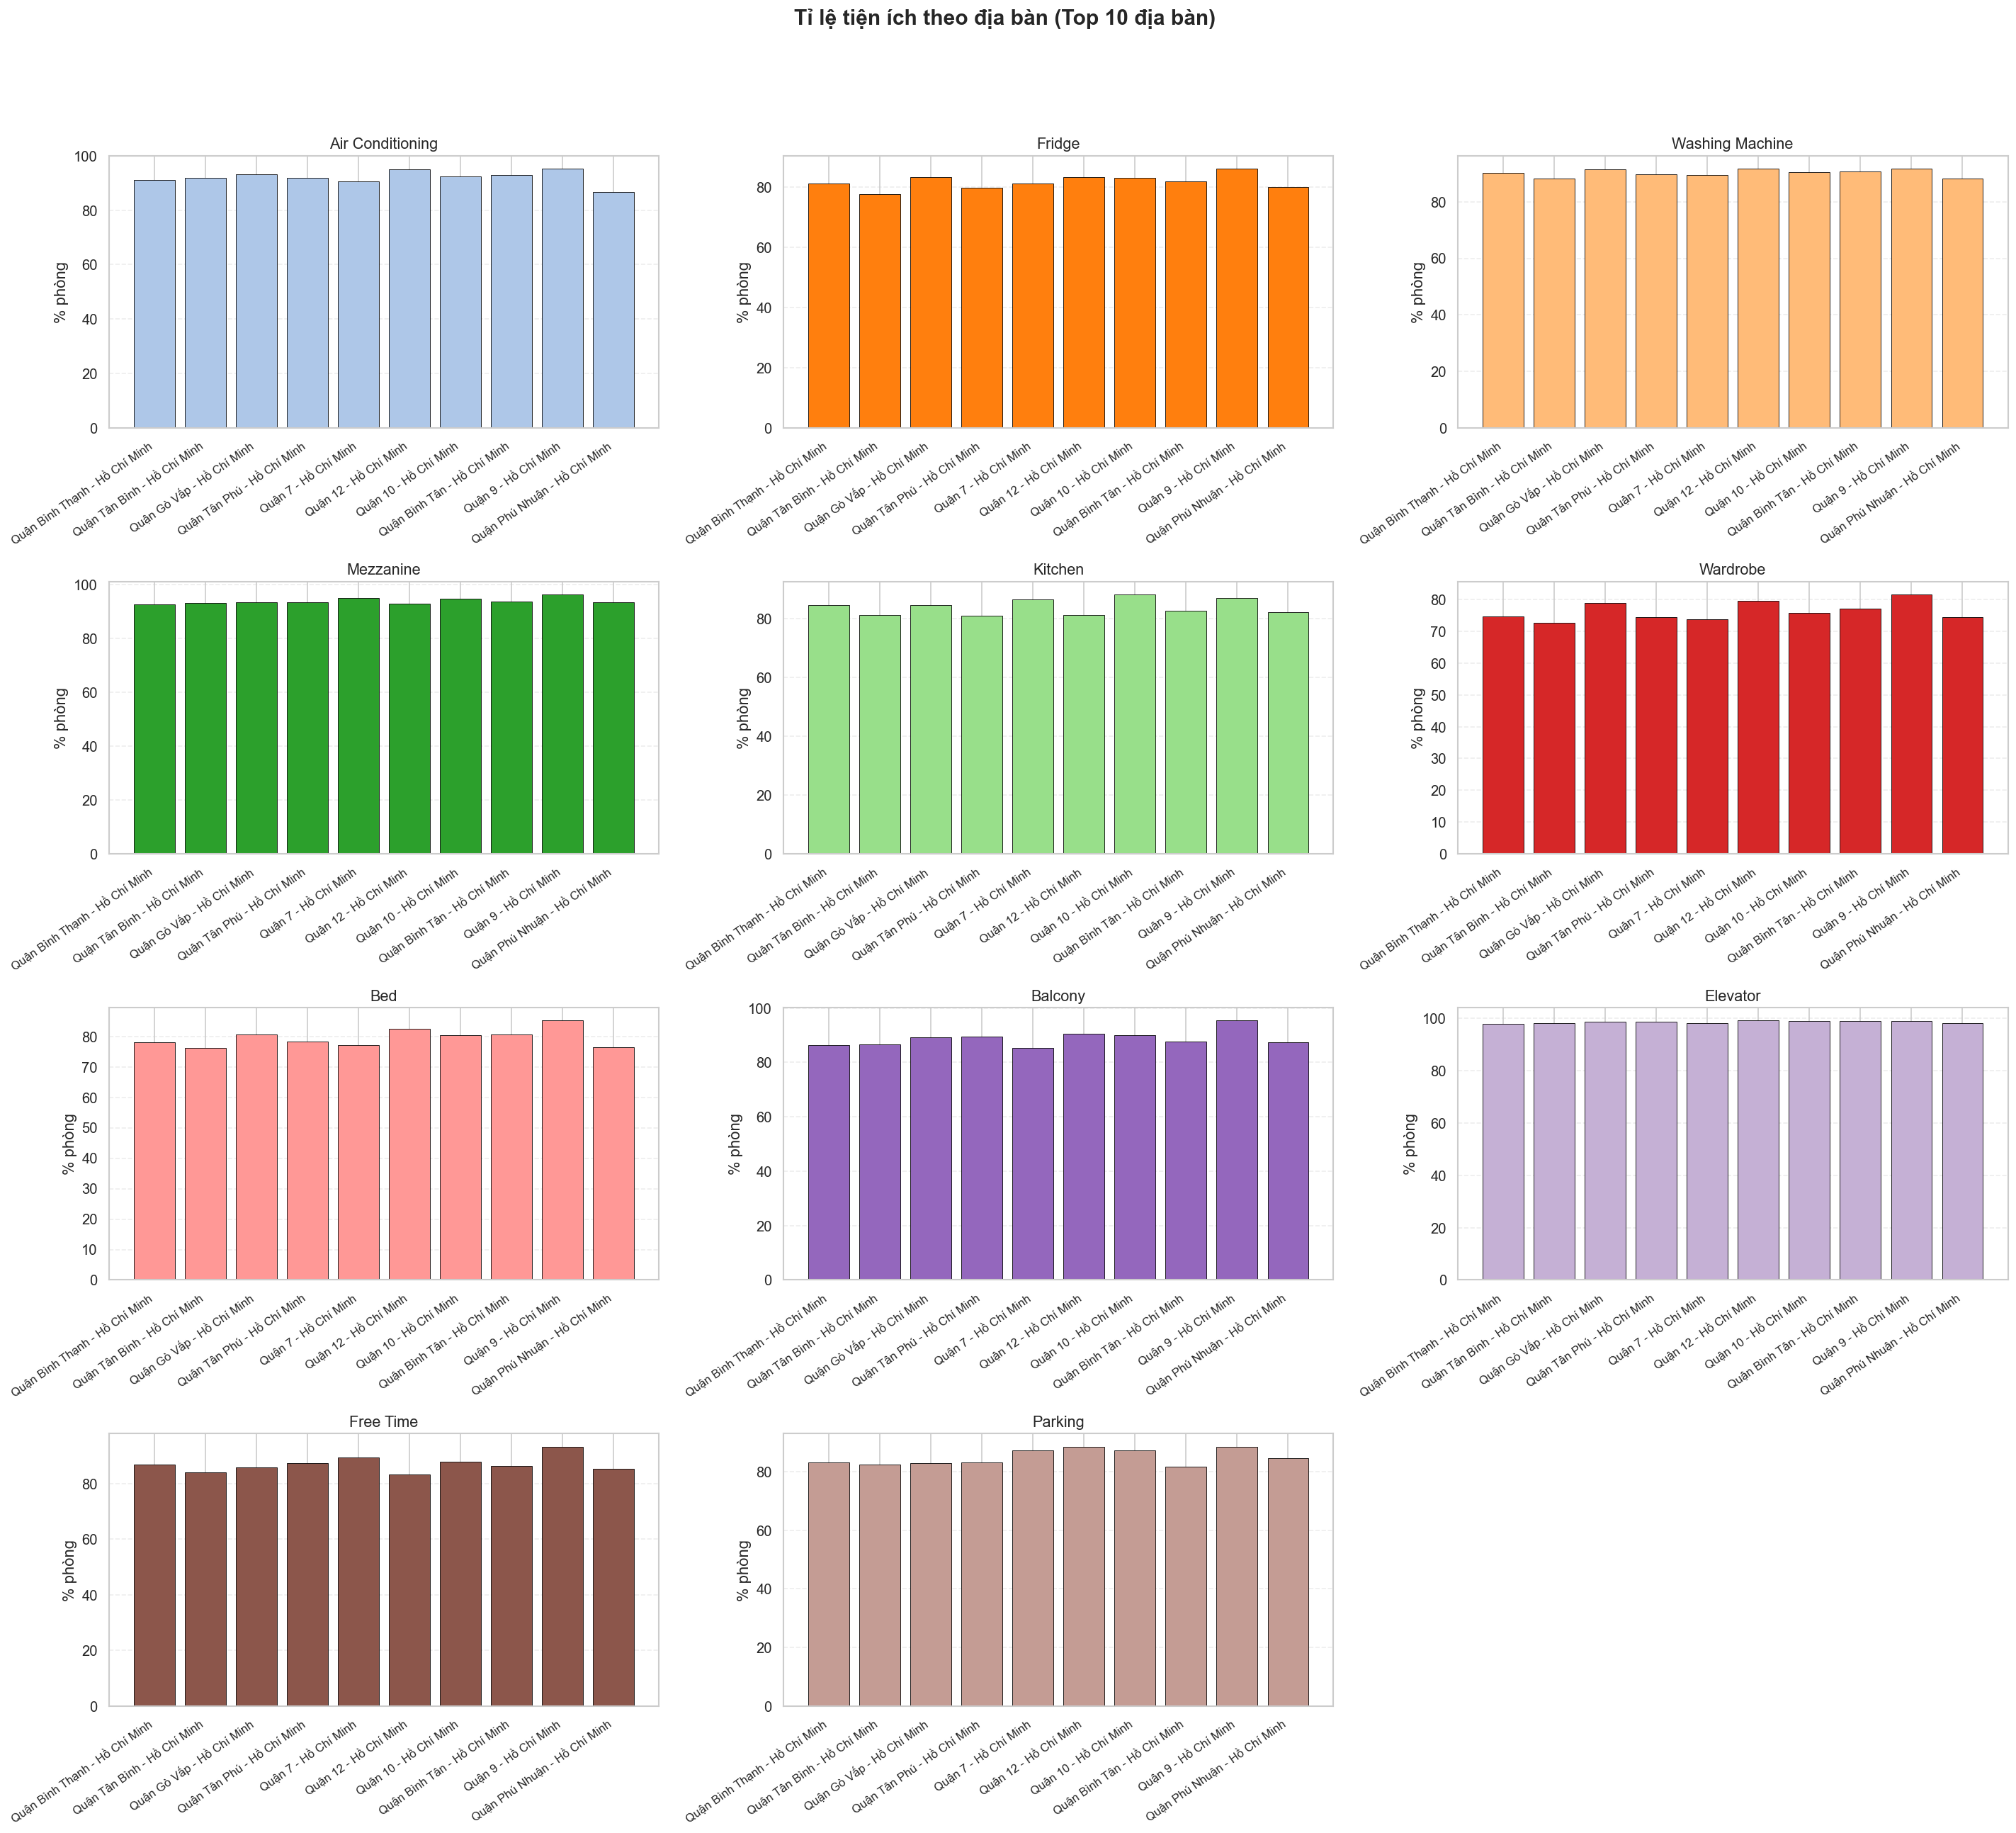

In [43]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

# Lấy danh sách tiện ích hợp lệ trong district_amenities_pct
valid_cols = [col for col in amenity_cols if col in district_amenities_pct.columns]

num_cols = len(valid_cols)
cols_per_row = 3
rows = int(np.ceil(num_cols / cols_per_row))

# Dùng colormap tab20 nhưng giới hạn an toàn bằng modulo
cmap = plt.cm.get_cmap("tab20")

plt.figure(figsize=(cols_per_row * 8, rows * 5.5))
plt.suptitle(
    f"Tỉ lệ tiện ích theo địa bàn (Top {len(district_amenities_pct)} địa bàn)",
    fontsize=18, weight="bold"
)

x = np.arange(len(district_amenities_pct.index))

for i, col in enumerate(valid_cols, 1):
    ax = plt.subplot(rows, cols_per_row, i)

    color = cmap(i % 20)

    ax.bar(
        x,
        district_amenities_pct[col],
        color=color,
        edgecolor="black",
        linewidth=0.5
    )

    ax.set_title(col.replace("_", " ").title(), fontsize=13)

    ax.set_xticks(x)
    ax.set_xticklabels(
        district_amenities_pct.index,
        rotation=35, ha="right", fontsize=10
    )

    ax.set_ylabel("% phòng")
    ax.grid(axis="y", linestyle="--", alpha=0.35)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

### **Phân tích & nhận xét**

#### **1. Bức tranh chung: phòng trọ TP.HCM đang “tiện nghi hóa” cực mạnh**
Khi nhìn các tỷ lệ tiện ích đều dao động **từ hơn 80% đến gần 100%**, cảm giác như: *“Ở Sài Gòn bây giờ, phòng trọ tiện nghi không khác gì nhà ở.”*

**Dữ liệu thực tế cho thấy ở các địa bàn nằm top đầu trong bảng:**

* **Thang máy** luôn trên ~97%, có nơi tới **99.06%** (Quận 12).  
* **Ban công** phần lớn nằm trong khoảng **85–95%**, với đỉnh ~**95.37%** (Quận 9).  
* **Máy lạnh** dao động khoảng **86.7–95.28%**.  
* **Gác lửng, bếp, máy giặt** cũng đều ở mức cao, thường **> 80–90%**.  

**Một sự thật khá bất ngờ:** Phòng *thiếu* tiện ích giờ mới là ngoại lệ, chứ phòng *có* đủ tiện ích không còn là điều gì “sang chảnh” nữa. Không phải chủ trọ thêm tiện ích để “đội giá” cho vui, mà là để bắt kịp mặt bằng chung của thị trường và quan trọng hơn là **không bị loại khỏi cuộc chơi**. Chỉ cần **thiếu** một vài tiện ích cơ bản, phòng rất dễ bị “out” khỏi list lựa chọn của người thuê.

#### **2. Quận ven áp đảo tiện ích – phòng mới nhiều, nhà xây đồng loạt**

**Điểm thú vị là:**
* Các quận như **Quận 9, Quận 12, Tân Phú, Gò Vấp** mới là “vùng đất hứa” của các tiện ích.
* Trong khi đó, các quận trung tâm như **Bình Thạnh, Tân Bình, Phú Nhuận** lại xuất hiện khá nhiều ở cột **min_pct** (tỷ lệ thấp nhất).

**Một vài con số tiêu biểu từ bảng “max/min”:**

* **Quận 9** dẫn đầu rất nhiều tiện ích:
  * Balcony: **95.37%**  
  * Air conditioning: **95.28%**  
  * Free time: **93.21%**  
  * Fridge: **86.22%**  
  * Bed: **85.14%**  
  * Wardrobe: **81.5%**
* **Quận 12** nổi bật ở:
  * Elevator: **99.06%**  
  * Washing machine: **91.74%**
* Ở chiều ngược lại:
  * Wardrobe thấp nhất: **Tân Bình – 72.53%**  
  * Fridge thấp nhất: **Tân Bình – 77.77%**  
  * Parking thấp nhất: **Bình Thạnh – 81.55%**  
  * Free time thấp nhất: **Quận 12 – 83.19%**

**Số liệu đúng theo thực tế:**

* **Quận ven** có quỹ đất rộng, đa số là các phòng được xây mới và xây đồng loạt theo “mẫu phòng hiện đại”, tiện ích đầy đủ là chuyện hiển nhiên, dùng để **bù lại bất lợi về vị trí xa trung tâm**. 
* **Quận trung tâm**:
  * Quỹ đất nhỏ  
  * Nhiều nhà trọ lâu năm. Phòng “từ thời đi xe Cub” vẫn cho thuê được có thể vì chủ trọ không muốn đập đi xây lại vì vẫn còn cho thuê "ngon".  
  * Hẻm nhỏ khó bố trí ban công, thang máy, bãi xe.  

#### **3. Ban công**
* **Cao nhất:** Quận 9 – **95.37%**  
* **Thấp nhất:** Quận 7 – **85.34%**

 **Nhìn vào con số và thực tế:**
  * Quận 9: nhiều phòng studio mới được xây nên việc có ban công gần như mặc định.  
  * Quận 7: có thể giải thích là vì quận 7 vẫn còn tồn tại các phòng trọ "truyền thống" nhiều nên tỉ lệ không bằng các địa bàn trong top nhưng vẫn cao (86.34%).  

#### **4. Gác lửng**
 * **Cao nhất:** Quận 9 – **96.26%**  
 * **Thấp nhất:** Bình Thạnh – **92.59%**

 Nhìn chung thì tỉ lệ có gác trên các địa bàn khá cao đặc biệt là ở vùng ven, tỉ lệ gác lửng ở các quận top 10 đều trên 92%, tức là đa số phòng được thiết kế để “nới” thêm không gian ngủ/học trên gác – rất đặc trưng cho mô hình phòng trọ Sài Gòn.

#### **5. Máy lạnh – từ “xa xỉ phẩm” thành “tiêu chuẩn sống”**
* **Cao nhất:** Quận 9 – **95.28%**  
* **Thấp nhất:** Phú Nhuận – **86.7%**

 Máy lạnh đạt trên 86–95%, một mức cực kỳ cao thậm chí cao hơn so với nhà ở thông thường.

 * **Cách đây 10 năm trước:** Phòng có máy lạnh được xem là “phòng VIP”, hiếm.
 * **Giờ đây:** Phòng không máy lạnh mới là “phòng kỳ lạ”.

#### **6. Máy giặt**
* **Cao nhất:** Quận 12 – **91.74%**  
* **Thấp nhất:** Phú Nhuận – **88.19%**

 Máy giặt 88–91% cho thấy tỉ lệ khá cao và trong thực tế các phòng trọ hiện đại thường lắp máy giặt chung, khá tiện lợi cho người thuê. Máy giặt chung theo tầng là tiêu chuẩn của các tòa trọ xây giai đoạn 2018 trở lại đây.

#### **7. Parking**
* **Cao nhất:** Quận 9 – 88.48%  
* **Thấp nhất:** Bình Tân – 81.55%
Parking thấp nhất Bình Tân (81.55%) vì:
 * Đường nhỏ,
 * Nhà chen nhau,
 * Không gian chật,
 * Giá đât đắt đỏ.
Quận ven rộng rãi, đất rộng nên tỉ lệ chỗ để xe miễn phí cao còn các địa bàn trung tâm hơn thì "tất đất, tất vàng" không gian để xe cũng là một chi phí cao nên các chủ trọ có xu hướng thu tiền đỗ xe nhiều hơn.

#### **8. Bếp**
* **Quận 10 là quận có bếp cao nhất (88.21%):** Nhiều phòng studio mini cho dân văn phòng, sinh viên y dược, các bác sĩ, y tá.
* **Tân Phú thấp nhất (81.08%):** Nhiều dãy trọ truyền thống.
* Phòng có bếp thường rơi vào phân khúc studio / căn hộ mini, hướng đến: Dân văn phòng, sinh viên đi làm thêm, có nhu cầu nấu ăn đều đặn, ở lâu dài.

#### **9. Giường & tủ áo**
* Bed: 76–77%
* Wardrobe: 72–81%
* Tỷ lệ giường và tủ áo thấp hơn rõ rệt so với mặt bằng chung của các tiện ích khác (đa số đều >85–90%). Điều này hoàn toàn hợp lý, vì đây là nhóm nội thất rời, không bắt buộc phải có trong mọi loại phòng. Về mặt thực tế thì đúng là đa số các chủ trọ chỉ trang bị máy lạnh, máy giặt, ... là chủ yếu còn các đồ nội thất trang trí thì họ sẽ để người thuê tự trang trí theo ý muốn. Có thể nói như sau:

“Phòng có giường + tủ = phòng dành cho người bận rộn, muốn vào ở ngay.” **Trong khi:** Phòng không giường/tủ thường nhắm đến người muốn tự trang trí – tự set up, thường rẻ hơn.


#### **Kết luận**
- **Chủ trọ vùng ven đầu tư tiện ích để cạnh tranh:** Vì khu ven có quỹ đất lớn, khi xây phòng mới thì sẽ theo “mẫu hiện đại”.

- **Chủ trọ trung tâm có vị trí đắt đỏ thì thường đầu tư nhiều cho nội thất:** Người thuê vẫn chấp nhận phòng không quá đẹp nhưng gần trung tâm.

- **Tiện ích có xu hướng đồng nhất hóa mạnh:** Sài Gòn đang tiến tới mô hình “phòng chuẩn hóa” như Singapore mini-studio.

- **Tiện ích** giờ đây không còn là công cụ để các chủ trọ tăng giá, mà để nắm bắt xu thế và tạo sự cạnh tranh.

---

### **3.2. Numerical × Categorical: Giá & diện tích theo quận / tiện ích**

Ở đây ta xem xét:

1. **Giá phòng (`price`) theo quận (`district`)** – thống kê: count, mean, median, 25%, 75%
2. **Giá phòng theo tiện ích** (ví dụ: có gác lửng vs không)
3. Có thể bổ sung thêm: **diện tích (`area`) theo quận / tiện ích**

Mục tiêu: hiểu được khu vực / tiện ích nào đang đi kèm với mức giá cao hơn hoặc thấp hơn.


In [44]:
# 1) Giá phòng theo quận (chỉ top N quận để bảng gọn hơn)
price_by_district = (
    df_top.groupby("district")["price"]
    .agg(["count", "mean", "median", "min", "max"])
    .sort_values("median", ascending=False)
)
print("Giá phòng theo quận (top N quận, sắp xếp theo median price):")
display(price_by_district)

# 2) Giá phòng theo tiện ích: ví dụ có/không gác lửng
if "has_mezzanine" in df.columns:
    price_mezz = df.groupby("has_mezzanine")["price"].describe()
    print("\nGiá phòng theo trạng thái có/không gác lửng:")
    display(price_mezz)

# 3) Diện tích theo quận (top N quận)
if "area" in df.columns:
    area_by_district = (
        df_top.groupby("district")["area"]
        .agg(["count", "mean", "median", "min", "max"])
        .sort_values("median", ascending=False)
    )
    print("\nDiện tích phòng theo quận (top N quận):")
    display(area_by_district)

KeyError: 'district'

## 4. Initial Observations & Insights

Dựa trên các phân tích ở trên (correlation, crosstab, thống kê nhóm), ta có thể ghi lại một số nhận xét.
Dưới đây là **gợi ý nội dung chi tiết**, bạn có thể chỉnh sửa câu chữ cho phù hợp với phong cách viết báo cáo.

### 4.1. 3–5 quan sát chính

1. **Giá phòng tập trung ở khoảng trung bình**, ví dụ median khoảng ~3.8 triệu, 90% giá trị nằm dưới ~5.6 triệu.  
   - Tuy nhiên, vẫn tồn tại một số **outlier rất lớn** (giá lên đến 900–990), kéo **mean** lên cao (~12 triệu).  
   - Điều này cho thấy phân phối giá bị lệch phải mạnh (right-skewed).

2. **Diện tích phòng phổ biến quanh 20–30 m²**, median ~25 m², đa phần phòng nhỏ và vừa.  
   - Một số outlier diện tích rất lớn (tối đa 1000 m²) – có thể là nhà nguyên căn, căn hộ dịch vụ lớn, hoặc lỗi nhập liệu.

3. **Các tiện ích có tương quan rất mạnh với nhau**, ví dụ:
   - `has_fridge` ↔ `has_wardrobe` (r ≈ 0.8)
   - `has_bed` ↔ `has_wardrobe` (r ≈ 0.7)
   - `has_fridge` ↔ `has_bed`, `has_washing_machine` ↔ `has_wardrobe`, v.v.  
   → Giải thích: nhiều tin đăng được gom thành “gói tiện ích đầy đủ”, khi có tủ lạnh thì thường cũng có giường, tủ áo, máy giặt,…

4. **Tương quan giữa `price` và `area` chỉ ở mức yếu** (r nhỏ, khoảng ~0.08), tức là:
   - Diện tích lớn không nhất thiết đồng nghĩa với giá cao (có thể do yếu tố vị trí, chất lượng phòng, nội thất,… quan trọng hơn).
   - Các tiện ích (`has_ac`, `has_fridge`, …) cũng chỉ tương quan rất yếu với `price` → Việc định giá còn phụ thuộc mạnh vào yếu tố khu vực, phân khúc.

5. **Sự khác biệt giá giữa các quận/huyện là rất rõ rệt** (quan sát từ bảng `price_by_district`):
   - Các quận trung tâm / “hot” như **Quận Bình Thạnh, Phú Nhuận, Quận 10,…** có median price cao hơn.
   - Các quận xa trung tâm hơn có median thấp hơn (ví dụ Quận 12, Bình Tân,…).

### 4.2. Vấn đề chất lượng dữ liệu (Data Quality Issues)

1. **Outliers về giá (`price`)**:
   - 99% dữ liệu có giá dưới khoảng 600, nhưng max lên đến 900–990 → khả năng cao có lỗi nhập liệu (ví dụ nhập nhầm đơn vị, giá bán nhà thay vì giá thuê theo tháng).

2. **Outliers về diện tích (`area`)**:
   - Phần lớn phòng có diện tích < 80 m², nhưng max tới 1000 m².  
   - Cần xem xét kỹ: đây có phải là nhà nguyên căn, mặt bằng lớn hay chỉ là lỗi gõ thêm số 0.

3. **Một số giá trị `area = 0` hoặc rất nhỏ bất thường**:
   - Diện tích 0 m² là không hợp lý về mặt vật lý → khả năng missing/unknown nhưng được mã hoá sai.

4. **Thiếu dữ liệu (`NaN`) tuy ít nhưng vẫn tồn tại** ở một số cột như `price`, `area`, `address`, `created_at`:
   - Dù tỷ lệ nhỏ (< 0.1%), nhưng cần quyết định rõ: **loại bỏ** hay **impute** trong mô hình hoá.

### 4.3. Các bước tiền xử lý (Preprocessing) cần thiết

1. **Xử lý outliers**:
   - Cắt (clip) giá trị `price` và `area` theo một ngưỡng hợp lý, ví dụ:
     - Giữ lại các giá trị trong khoảng [1, 20] (tuỳ đơn vị) cho `price` nếu đó là giá thuê theo tháng tính bằng triệu.
     - Giữ lại `area` trong khoảng [5, 100] m² cho phòng trọ thông thường.
   - Hoặc áp dụng **log-transform** cho `price` để giảm ảnh hưởng của outlier.

2. **Xử lý giá trị 0 hoặc bất thường** ở `area`:
   - Có thể coi `area == 0` là missing và loại bỏ những dòng này (do số lượng ít).

3. **Chuẩn hoá cột thời gian `created_at`**:
   - Trích xuất thêm đặc trưng: `year`, `month`, `day_of_week` nếu cần phân tích theo trend thời gian.

4. **Mã hoá biến phân loại (`district`, …)**:
   - Dùng **One-Hot Encoding** cho các biến phân loại phổ biến (top quận) và gộp các quận ít dữ liệu vào nhóm “Other” để tránh quá nhiều category hiếm.

5. **Cân nhắc scaling các biến số** (đặc biệt là `price`, `area`) nếu sử dụng các mô hình nhạy với scale (SVM, KNN, Linear model,…).

### 4.4. Pattern thú vị & câu hỏi nghiên cứu

Từ các pattern ở trên, có thể đặt ra một số câu hỏi nghiên cứu:

1. **Yếu tố nào ảnh hưởng mạnh nhất đến giá thuê?**
   - Vị trí (quận/huyện), diện tích, hay gói tiện ích (full nội thất, có máy lạnh, máy giặt…)?

2. **Các quận/huyện có cấu trúc phân khúc giá khác nhau thế nào?**
   - Ví dụ: Quận Bình Thạnh có nhiều phân khúc cao cấp hơn, hay chỉ đơn giản là mặt bằng giá chung cao hơn?

3. **Sự hiện diện của gác lửng (`has_mezzanine`) có thực sự làm giá tăng đáng kể không?**
   - Có thể kiểm tra bằng so sánh thống kê (t-test, boxplot giá theo `has_mezzanine`).

4. **Xu hướng giá theo thời gian (created_at)**:
   - Giá thuê có tăng dần qua các năm? Có mùa cao điểm thuê trọ không (ví dụ trước năm học mới)?

Bạn có thể sử dụng phần này làm khung để viết phần **Discussion / Kết luận EDA** trong báo cáo.


## 5. Red Flags

Trong phần này, ta liệt kê rõ các **vấn đề nghiêm trọng** hoặc **hạn chế** của bộ dữ liệu mà người đọc cần chú ý.

### 5.1. Các vấn đề nghiêm trọng (Serious Data Quality Concerns)

1. **Outliers cực lớn về giá và diện tích**
   - `price` có một số giá trị lên tới 900–990 trong khi phần lớn dữ liệu chỉ nằm quanh vài triệu → rất có thể là:
     - Lỗi nhập liệu (nhập giá bán, nhập đơn vị khác,…)
     - Bất thường so với phân phối chung của tập dữ liệu.
   - `area` có giá trị 0 m² và lên đến 1000 m² → cũng cần được kiểm tra lại.

2. **Đơn vị đo lường không được ghi rõ ràng trong dữ liệu**
   - Ví dụ: `price` có thể là triệu đồng/tháng, nhưng trong file không ghi rõ. Điều này gây khó khăn khi diễn giải/so sánh với dữ liệu bên ngoài.

3. **Phân bố địa lý không đồng đều**
   - Một số quận/huyện có rất nhiều tin, trong khi nhiều quận khác chỉ có 1–2 tin → dễ gây **thiên lệch thống kê** khi so sánh giữa các khu vực.

### 5.2. Hạn chế đối với phân tích / mô hình hóa

1. **Khó xây dựng mô hình dự báo chính xác nếu không xử lý outliers**
   - Các giá trị cực đoan sẽ kéo theo việc mô hình bị học sai (overfit vào vài điểm lỗi).

2. **Khả năng thiếu các biến quan trọng khác**
   - Chẳng hạn: khoảng cách đến trung tâm, chất lượng nội thất, độ mới của phòng/trọ, chi phí điện/nước,… không được lưu trong dataset nên mô hình về giá sẽ bị thiếu thông tin.

3. **Dữ liệu thu thập từ nhiều năm khác nhau**
   - `created_at` trải dài nhiều năm (2018 → 2025), nhưng nếu không điều chỉnh theo lạm phát / xu hướng thị trường thì việc so sánh giá giữa các năm có thể gây hiểu nhầm.
---

## **4. Initial Observations & Insights**

### Insight 1 – Amenities form strong clusters, not stand-alone features  
→ Phù hợp để tạo feature mới như:
- `num_amenities`  
- `is_full_furnished` (≥4 tiện ích nội thất)  
- `is_apartment_like` (balcony + elevator + washing_machine)

---

### Insight 2 – Price/Area are unrelated to amenities  
→ Nếu muốn mô hình dự đoán giá tốt:  
**bắt buộc thêm:**
- `address` (quận/huyện)  
- loại phòng (phân khúc)  
- độ mới tòa nhà  
- street-level features  

---

### Insight 3 – There are at least 3 distinct market segments
1. **Bình dân** — ít tiện ích, giá thấp, thường ngoại thành.  
2. **Full nội thất / Studio** — nhiều tiện ích, trung tâm hoặc toà mới.  
3. **Căn hộ mini / Chung cư** — có balcony, elevator, máy giặt.

Feature engineering sau này nên dựa trên phân khúc này.

---

### Insight 4 – Free_time = indicator of “quality of life”  
Có thể dùng feature này để phân loại:
- Phòng chung chủ vs phòng riêng chủ.
- Mức độ thoải mái → liên quan gián tiếp đến phân khúc.

---

### Insight 5 – Mezzanine is a mixed-signal feature  
Không thể mặc định:
- mezzanine = phòng rẻ  
→ Sai trong dataset này.

Cần kết hợp với:
- area  
- balcony  
- elevator  
để phân loại đúng.

---

## 5. Red Flags

### Red Flag 1 — Price not correlated to area or amenities
→ Nếu không thêm features khác, mô hình dự đoán giá sẽ cực kỳ yếu.

### Red Flag 2 — Mezzanine ambiguous
→ Có thể gây nhiễu mô hình nếu không phân loại theo phân khúc trước.

### ⚠️ Red Flag 3 — Amenities dataset likely biased
- Các tiện ích hay “đi chung gói”, không phân bố đều.  
→ Cần kiểm tra imbalance:
  - Tỷ lệ 1 quá cao hay quá thấp?  
  - Một số tiện ích có thể chiếm 90% hoặc chỉ 5%.

### ⚠️ Red Flag 4 — No temporal features
Cột `date` không xuất hiện trong phân tích này:
- Có thể có seasonality (đầu năm, mùa nhập học…)

### Red Flag 5 — Missing contextual geographical features
`address` tốt, nhưng:
- Không phân tách quận/phường/xã → có thể làm giảm granularity.  
- Cần chuẩn hoá sâu hơn để mô hình hiểu rõ vùng giá.

## 6. Executive Summary

- Thị trường phòng trọ trong dataset chia thành **3 phân khúc** rất rõ rệt.
- Tiện ích đi theo **combo**, đặc biệt nhóm full nội thất có tương quan cực cao.
- Giá và diện tích **không** giải thích được biến động giá → cần kết hợp địa bàn.
- Ban công, thang máy, máy giặt = dấu hiệu mạnh của căn hộ mini.
- Gác lửng **không chỉ** xuất hiện ở phòng giá rẻ.
- Free_time phản ánh “mức độ thoải mái” trong sinh hoạt.